In [1]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import matplotlib 
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import KFold

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import imblearn as imb

from sklearn.metrics import confusion_matrix
import itertools

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

import sys
sys.path.append('../../')
# import utils
from sklearn.model_selection import GridSearchCV
from VisUtils import *
from split_data import *
from RF_GSCV import *

# Load binding data 

In [2]:
split_path = '../../../../../data/NEK_data_4Berkeley/NEK2/'
# train_x_df = pd.read_csv(split_path+"/NEK2_binding_random_fold1_trainX.csv")
# train_y_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_trainY.csv")
# test_x_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_testX.csv")
# test_y_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_testY.csv")
# train_x = torch.from_numpy(train_x_df.to_numpy())
# train_y = torch.from_numpy(train_y_df.to_numpy().reshape(-1))
# test_x = torch.from_numpy(test_x_df.to_numpy())
# test_y = torch.from_numpy(test_y_df.to_numpy().reshape(-1))

train_x_df = pd.read_csv(split_path+'bind/bind_train_x_Morgan2ADASYN.csv')
train_y_df= pd.read_csv(split_path+'bind/bind_train_y_Morgan2ADASYN.csv')
test_x_df= pd.read_csv(split_path+'bind/bind_test_x_Morgan2ADASYN.csv')
test_y_df= pd.read_csv(split_path+'bind/bind_test_y_Morgan2ADASYN.csv')

train_x = train_x_df.to_numpy()
train_y = train_y_df.to_numpy().reshape(-1)
test_x = test_x_df.to_numpy()
test_y = test_y_df.to_numpy().reshape(-1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape



((2164, 2048), (2164,), (282, 2048), (282,))

# ADASYN

In [3]:
# # Scale data
# x_df = pd.concat([train_x_df, test_x_df])

# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(x_df)
# Scaled_data=scaling.transform(x_df)
# train_x = scaling.transform(train_x_df)
# test_x = scaling.transform(test_x_df) 

# adasyn = ADASYN() 
# train_x_temp, train_y_temp = adasyn.fit_resample(train_x, train_y_df)
# train_x = train_x_temp
# train_y = train_y_temp.to_numpy().flatten()
# test_y = test_y_df.to_numpy().flatten()

# # # back to df for saving 
# train_x_df = pd.DataFrame(train_x) 
# train_y_df = pd.DataFrame(train_y) 
# test_y_df = pd.DataFrame(test_y)
# test_x_df = pd.DataFrame(test_x)

# train_x_df.to_csv(split_path+'bind_train_x_ADASYN.csv', index=False, header=False)
# train_y_df.to_csv(split_path+'bind_train_y_ADASYN.csv', index=False, header=False) 
# test_y_df.to_csv(split_path+'bind_test_y_ADASYN.csv', index=False, header=False) 
# test_x_df.to_csv(split_path+'bind_test_x_ADASYN.csv', index=False, header=False) 


accuracy: 1.000, precision: 1.000, recall: 0.999, specificity: 1.000
accuracy: 0.961, precision: 0.556, recall: 0.417, specificity: 0.985
TRAIN: accuracy: 1.000, precision: 1.000, recall: 0.999, specificity: 1.000
TEST: accuracy: 0.961, precision: 0.556, recall: 0.417, specificity: 0.985


<Figure size 600x400 with 0 Axes>

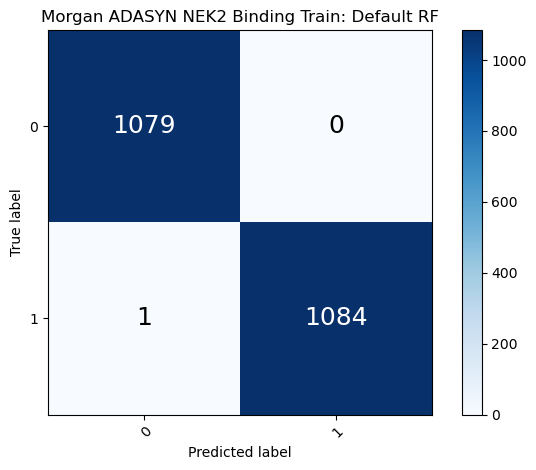

<Figure size 600x400 with 0 Axes>

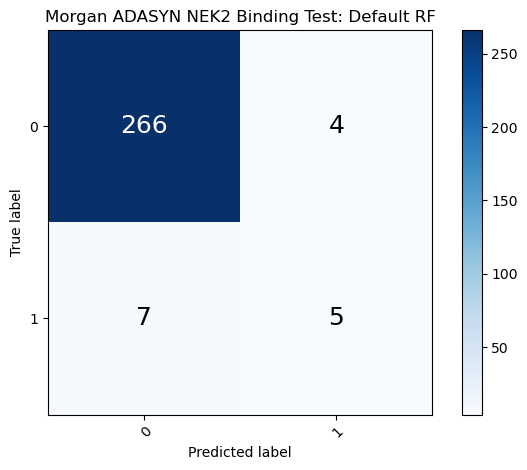

In [3]:
rf_basic100estADASYN= rf_models(train_x, train_y, test_x, test_y, 'basic RF', {})
plot_confusion_matrix(train_y, rf_basic100estADASYN['train_pred'], ['0','1'], title='Morgan ADASYN NEK2 Binding Train: Default RF')
plot_confusion_matrix(test_y, rf_basic100estADASYN['test_pred'], ['0','1'], title='Morgan ADASYN NEK2 Binding Test: Default RF')

# Reduced param grid for grid search - RUN IN BASH SCRIPT 

In [4]:
param_grid = {
    'n_estimators': np.linspace(100, 2000, 3, dtype = int),
    'max_depth': [20, 100, 200, 220],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 5],
    'criterion': ['gini','entropy']
}

In [5]:
save_file = 'atom_nek2bindMorgan2ADASYN_rf_basic_best.pkl'
# rf_basicbestADASYN = find_best_models(train_x, train_y, test_x, test_y, 'basic RF', {}, param_grid, 2)

TRAIN: accuracy: 0.991, precision: 0.996, recall: 0.985,  specificity: 0.996
TEST: accuracy: 0.954, precision: 0.444, recall: 0.333, specificity: 0.981


<Figure size 600x400 with 0 Axes>

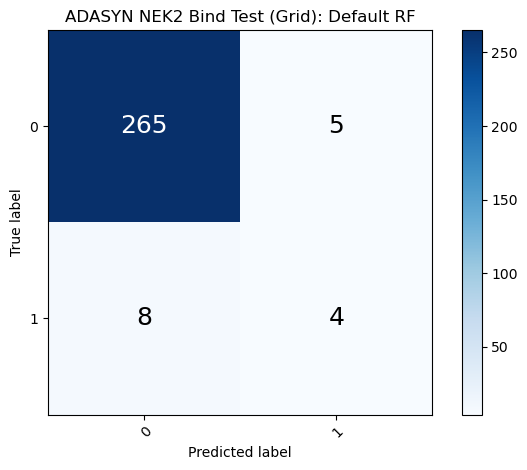

In [6]:
# with open(save_file, 'wb') as f:
#     pickle.dump(rf_basicbestADASYN['best_model'], f)

with open('../saved_models/'+save_file, 'rb') as f: 
    rf_basicbestADASYN = pickle.load(f) 
gridresults1 = rf_results2(rf_basicbestADASYN, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults1['test_pred'], ['0','1'], title='ADASYN NEK2 Bind Test (Grid): Default RF')



In [17]:
for param, value in rf_basicbestADASYN.get_params().items():
    print(f'{param}: {value}')

bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 200
max_features: None
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 4
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 1050
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


# Basic RF + classweight balanced 

TRAIN: accuracy: 1.000, precision: 1.000, recall: 0.999, specificity: 1.000
TEST: accuracy: 0.961, precision: 0.556, recall: 0.417, specificity: 0.985


<Figure size 600x400 with 0 Axes>

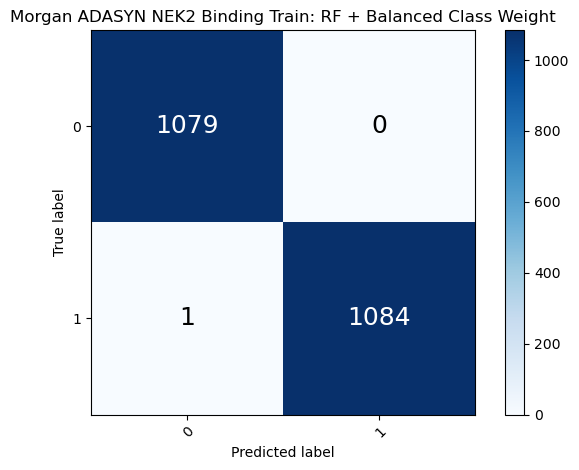

<Figure size 600x400 with 0 Axes>

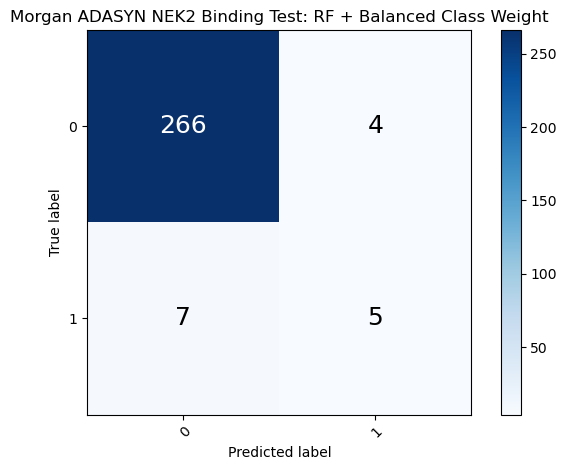

In [7]:
brf_model_BCW_ADASYN = rf_models(train_x, train_y, test_x, test_y, 'balanced class_weight', {})
plot_confusion_matrix(train_y, brf_model_BCW_ADASYN['train_pred'], ['0','1'], title='Morgan ADASYN NEK2 Binding Train: RF + Balanced Class Weight')
plot_confusion_matrix(test_y, brf_model_BCW_ADASYN['test_pred'], ['0','1'], title='Morgan ADASYN NEK2 Binding Test: RF + Balanced Class Weight')

In [8]:
save_file2 = 'atom_nek2bindMorgan2ADASYN_rf_basicBCW_grid.pkl'
# rf_basicBCWbestADASYN = find_best_models(train_x, train_y, test_x, test_y, 'balanced class_weight', {}, param_grid, 2)
# with open('atom_nek2bindMorgan2ADASYN_rf_basicBCW_grid.pkl', 'wb') as f:
#     pickle.dump(rf_basicBCWbestADASYN['best_model'], f)

TRAIN: accuracy: 0.997, precision: 1.000, recall: 0.994,  specificity: 1.000
TEST: accuracy: 0.950, precision: 0.400, recall: 0.333, specificity: 0.978


<Figure size 600x400 with 0 Axes>

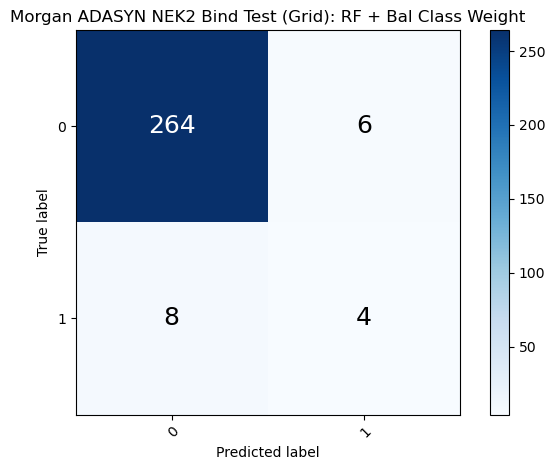

In [9]:
with open('../saved_models/'+save_file2, 'rb') as f: 
    gridRF_BCW_ADASYN = pickle.load(f) 
gridresults2 = rf_results2(gridRF_BCW_ADASYN, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults2['test_pred'], ['0','1'], title='Morgan ADASYN NEK2 Bind Test (Grid): RF + Bal Class Weight')


In [10]:
for param,value in gridRF_BCW_ADASYN.get_params().items():
    print(f'{param}: {value}')

bootstrap: False
ccp_alpha: 0.0
class_weight: balanced
criterion: entropy
max_depth: 100
max_features: None
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 1050
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


# Balanced Random Forest Classifier

/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 1.000, recall: 0.999, specificity: 1.000
TEST: accuracy: 0.957, precision: 0.500, recall: 0.417, specificity: 0.981


<Figure size 600x400 with 0 Axes>

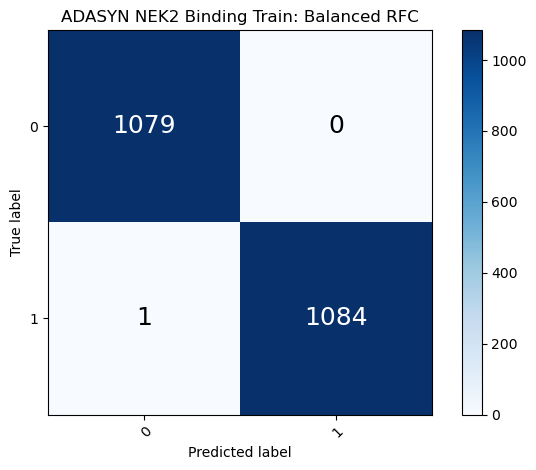

<Figure size 600x400 with 0 Axes>

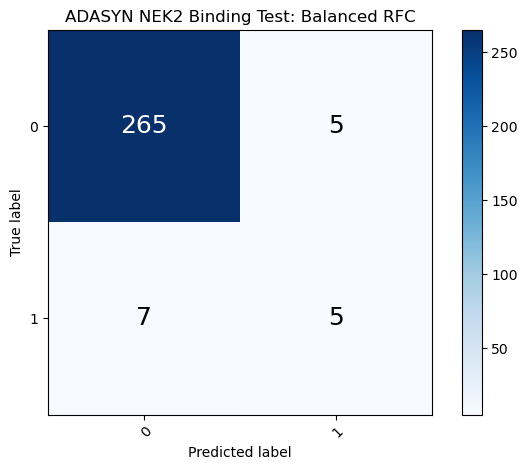

In [11]:
brf_modelADASYN = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {})
plot_confusion_matrix(train_y, brf_modelADASYN['train_pred'], ['0','1'], title='ADASYN NEK2 Binding Train: Balanced RFC')
plot_confusion_matrix(test_y, brf_modelADASYN['test_pred'], ['0','1'], title='ADASYN NEK2 Binding Test: Balanced RFC')

In [13]:
save_file3 = 'atom_nek2bindMorgan2ADASYN_BRFC_best.pkl'
# brfc_bestADASYN = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {}, param_grid, 2)

# with open(save_file3, 'wb') as f:
#     pickle.dump(brfc_bestADASYN['best_model'], f)

TRAIN: accuracy: 0.988, precision: 0.992, recall: 0.984,  specificity: 0.992
TEST: accuracy: 0.961, precision: 0.556, recall: 0.417, specificity: 0.985


<Figure size 600x400 with 0 Axes>

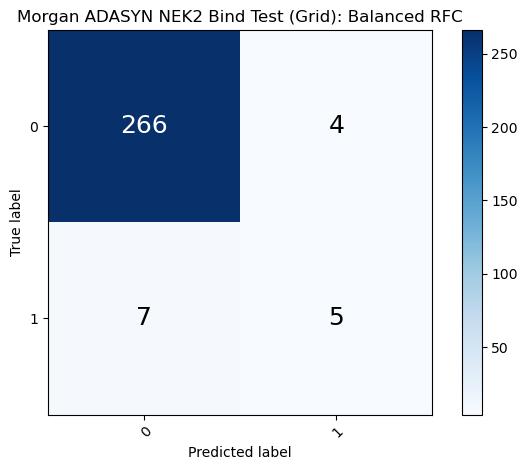

In [14]:
save_file3 = 'atom_nek2bindMorgan2ADASYN_BRFC_best.pkl'
with open('../saved_models/'+save_file3, 'rb') as f: 
    brfc_bestADASYN = pickle.load(f) 

gridresults3 = rf_results2(brfc_bestADASYN, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults3['test_pred'], ['0','1'], title='Morgan ADASYN NEK2 Bind Test (Grid): Balanced RFC')


In [15]:
for param, value in brfc_bestADASYN.get_params().items():
    print(f'{param}: {value}')

bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 20
max_features: None
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 1050
n_jobs: None
oob_score: False
random_state: None
replacement: warn
sampling_strategy: warn
verbose: 0
warm_start: False


# Try BRFC with balanced class weight & bootstrap

/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/nek2_final/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 0.999, recall: 1.000, specificity: 0.999
TEST: accuracy: 0.957, precision: 0.500, recall: 0.333, specificity: 0.985


<Figure size 600x400 with 0 Axes>

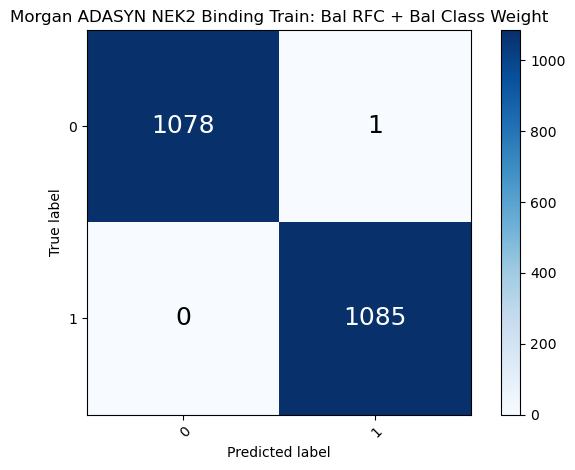

<Figure size 600x400 with 0 Axes>

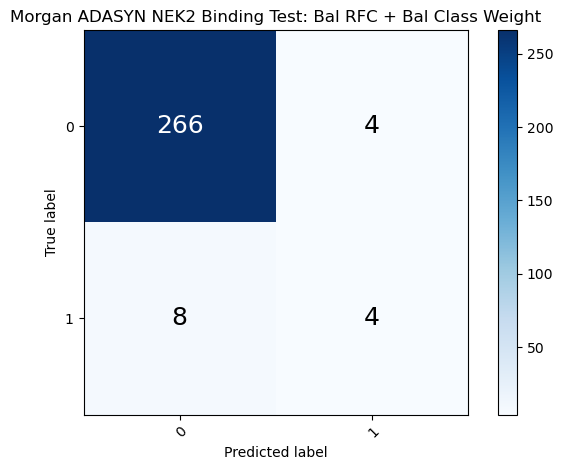

In [16]:
brf_modelCWB_ADASYN = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced', 'bootstrap':True})
plot_confusion_matrix(train_y, brf_modelCWB_ADASYN['train_pred'], ['0','1'], title='Morgan ADASYN NEK2 Binding Train: Bal RFC + Bal Class Weight')
plot_confusion_matrix(test_y, brf_modelCWB_ADASYN['test_pred'], ['0','1'], title='Morgan ADASYN NEK2 Binding Test: Bal RFC + Bal Class Weight')

In [19]:
save_file4 = 'atom_nek2bindMorgan2ADASYN_BRFC_BCW_best.pkl'
# brfc_BCW_ADASYN_best = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced', 'bootstrap':True}, param_grid,2)


TRAIN: accuracy: 0.988, precision: 0.992, recall: 0.984,  specificity: 0.992
TEST: accuracy: 0.961, precision: 0.556, recall: 0.417, specificity: 0.985


<Figure size 600x400 with 0 Axes>

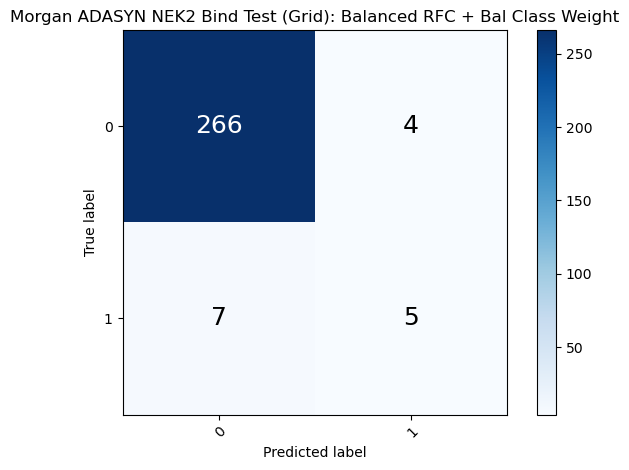

In [20]:
# save_file4 = 'atom_nek2bindMorgan2ADASYN_BRFC_BCW_best.pkl'
# with open(save_file4, 'wb') as f:
#     pickle.dump(brfc_BCW_ADASYN_best['best_model'], f)

with open('../saved_models/'+save_file4, 'rb') as f: 
    brfc_BCW_ADASYN_best = pickle.load(f) 

gridresults4 = rf_results2(brfc_BCW_ADASYN_best, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults4['test_pred'], ['0','1'], title='Morgan ADASYN NEK2 Bind Test (Grid): Balanced RFC + Bal Class Weight')


In [21]:
for param, value in brfc_BCW_ADASYN_best.get_params().items():
    print(f'{param}: {value}')

bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 20
max_features: None
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 4
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
replacement: warn
sampling_strategy: warn
verbose: 0
warm_start: False


In [13]:
nek2bind_ADASYNmodels = {'default_RF':rf_basicbestADASYN, 'rf_bcw':gridRF_BCW_ADASYN,
                              'BRFC':brfc_bestADASYN, 'BRFC_bcw':brfc_BCW_ADASYN_best}

with open('nek2bind_Morgan2ADASYNmodels.pkl', 'wb') as f:
    pickle.dump(nek2bind_ADASYNmodels, f)


In [21]:
nek2bind_ADASYNmodels

{'default_RF': RandomForestClassifier(bootstrap=False, max_depth=200, max_features=None,
                        min_samples_leaf=2, min_samples_split=4,
                        n_estimators=1050),
 'rf_bcw': RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=220,
                        max_features=None, min_samples_leaf=2),
 'BRFC': BalancedRandomForestClassifier(bootstrap=False, max_depth=100,
                                max_features=None, min_samples_leaf=2,
                                min_samples_split=4, n_estimators=1050),
 'BRFC_bcw': BalancedRandomForestClassifier(bootstrap=False, max_depth=100,
                                max_features=None, min_samples_leaf=2,
                                min_samples_split=4, n_estimators=1050)}

In [14]:
grid_models = [rf_basicbestADASYN, gridRF_BCW_ADASYN,brfc_bestADASYN,brfc_BCW_ADASYN_best]
model_dictionaries = []
for i, model in enumerate(grid_models): 
    print(model)
    
    train_results = save_rf_results(model, train_x, train_y)
    test_results  = save_rf_results(model, test_x, test_y) 
    print(test_results['recall'])
    model_dict = {'model':model, 'train_results':train_results, 'test_results':test_results}
    model_dictionaries.append(model_dict) 

with open('nek2_bind_Morgan2ADASYN_results.pkl', 'wb') as f:
    pickle.dump(model_dictionaries, f)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=220,
                       max_features=None, min_samples_leaf=5)
0      0.333333
1      0.333333
2      0.333333
3      0.333333
4      0.333333
         ...   
277    0.333333
278    0.333333
279    0.333333
280    0.333333
281    0.333333
Name: recall, Length: 282, dtype: float64
RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=100, max_features=None,
                       min_samples_leaf=2, n_estimators=1050)
0      0.333333
1      0.333333
2      0.333333
3      0.333333
4      0.333333
         ...   
277    0.333333
278    0.333333
279    0.333333
280    0.333333
281    0.333333
Name: recall, Length: 282, dtype: float64
BalancedRandomForestClassifier(bootstrap=False, max_depth=20, max_features=None,
                               min_samples_leaf=5, n_estimators=1050)
0      0.416667
1      0.416667
2      0.416667
3      0.416667
4     

In [25]:
with open('nek2_bind_ADASYN_results.pkl', 'rb') as f: 
    results1= pickle.load(f)
recalls = [] 
for m, model in enumerate(results1): 
    recalls.append(model['test_results']['recall'])
# recalls

/Users/jayceepang/msse/capstone/gpytorch-venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/msse/capstone/gpytorch-venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


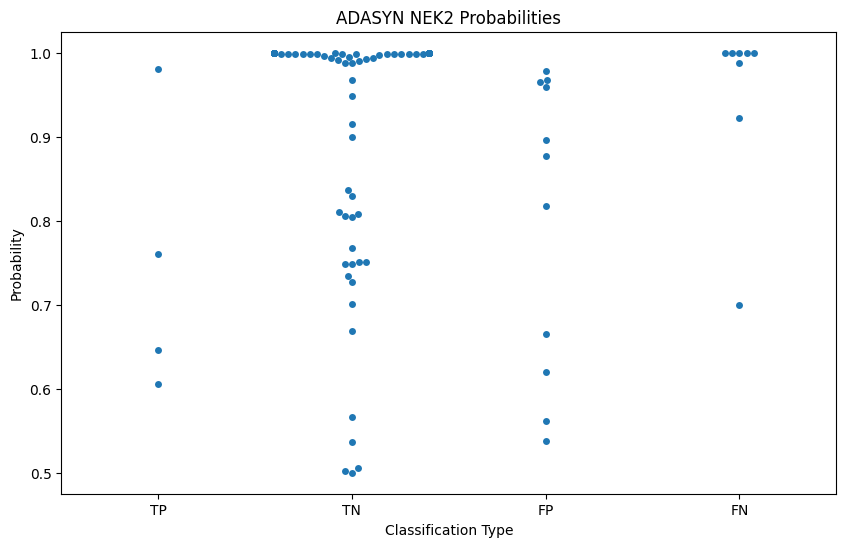

In [26]:
swarm_prob(brfc_BCW_ADASYN_best, test_x, test_y, 'ADASYN NEK2 Probabilities')